<a href="https://colab.research.google.com/github/dlarsson2000/ML4BiotechProject/blob/main/CB206V_Group_6_Project_Drug_repurposing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycaret
!pip install panda

  Preparing metadata (setup.py) ... done
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7239 sha256=d914d94124387f9d7b6b714d72a77d5e6275562993e0f778fe76d3a358c840ad
  Stored in directory: /root/.cache/pip/wheels/0e/8b/c3/ff9cbde1fffd8071cff8367a86f0350a1ce30a8d31b6a432e9
Successfully built panda


In [3]:
import pandas as pd
import numpy as np
from pycaret.regression import *

In [4]:
dataset = pd.read_csv('https://raw.githubusercontent.com/dlarsson2000/ML4BiotechProject/main/grk2_fp_data.csv')
df_X = dataset.drop(columns=['chembl_id', 'canonical_smiles', 'bioactivity'])
model = setup(data = df_X, target = 'pIC50', train_size=0.8, fold=5)

,Description,Value
0,Session id,7199
1,Target,pIC50
2,Target type,Regression
3,Original data shape,"(312, 1025)"
4,Transformed data shape,"(312, 1025)"
5,Transformed train set shape,"(249, 1025)"
6,Transformed test set shape,"(63, 1025)"
7,Numeric features,1024
8,Preprocess,True
9,Imputation type,simple


In [29]:
bm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.5851,0.6345,0.7892,0.6060,0.1177,0.1036,0.2700
ada,AdaBoost Regressor,0.6153,0.6605,0.8031,0.5960,0.1189,0.1075,0.8640
rf,Random Forest Regressor,0.5708,0.6524,0.7969,0.5949,0.1189,0.1021,1.5260
lightgbm,Light Gradient Boosting Machine,0.5784,0.6543,0.8001,0.5912,0.1192,0.1029,0.6820
knn,K Neighbors Regressor,0.5911,0.6787,0.8123,0.5847,0.1210,0.1060,0.2180
gbr,Gradient Boosting Regressor,0.5911,0.6761,0.8151,0.5744,0.1219,0.1054,0.5720
xgboost,Extreme Gradient Boosting,0.6246,0.7618,0.8651,0.5217,0.1277,0.1110,1.0880
ridge,Ridge Regression,0.7001,0.8675,0.9247,0.4507,0.1386,0.1230,0.2100
huber,Huber Regressor,0.7034,0.8971,0.9428,0.4361,0.1423,0.1232,0.3140
et,Extra Trees Regressor,0.6886,0.9427,0.9607,0.3972,0.1417,0.1209,1.3180


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [30]:
br = create_model(bm, return_train_score=True, fold=5)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [31]:
print(br)
tuned_br = tune_model(br, n_iter = 100, optimize = 'mae')

BayesianRidge()


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7002,0.8524,0.9233,0.5461,0.1419,0.1314
1,0.5934,0.7029,0.8384,0.6053,0.1266,0.1038
2,0.6375,0.7256,0.8518,0.5728,0.1342,0.1228
3,0.5297,0.5044,0.7102,0.5457,0.1016,0.0869
4,0.4628,0.3918,0.6259,0.7541,0.0849,0.0727
Mean,0.5847,0.6354,0.7899,0.6048,0.1178,0.1035
Std,0.0826,0.1651,0.1070,0.0778,0.0213,0.0218


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 100 candidates, totalling 500 fits


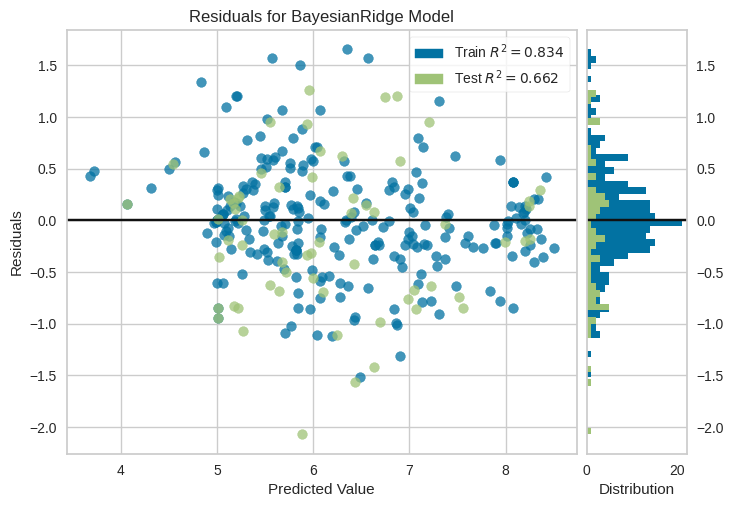

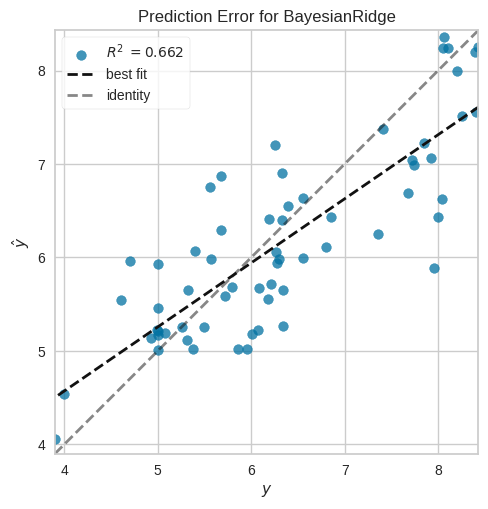

In [32]:


plot_model(tuned_br, 'residuals')

plot_model(tuned_br, 'error')


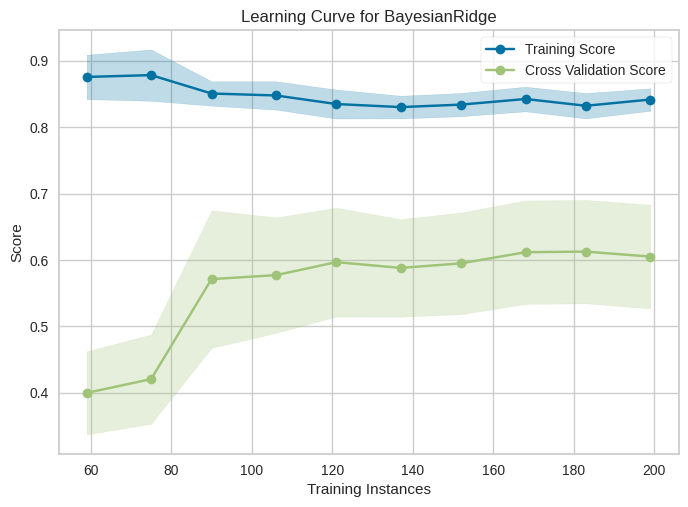

In [33]:
plot_model(tuned_br, plot = 'learning')

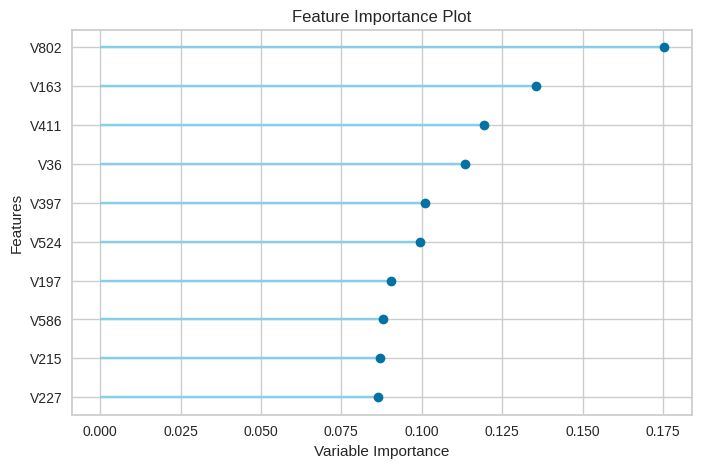

In [34]:
plot_model(tuned_br, 'feature')

In [35]:
prediction_holdout = predict_model(tuned_br)

prediction_holdout.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.5545,0.4905,0.7004,0.6617,0.0958,0.0880


,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028,pIC50,prediction_label
306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.000000,5.217114
162,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,6.853872,6.428068
260,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,6.193820,6.409657
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.677781,6.691330
297,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.744728,6.984868


In [36]:
# read prediction data from file
dataset2 = pd.read_csv('https://raw.githubusercontent.com/dlarsson2000/ML4BiotechProject/main/drug_phaseIV_fp_data.csv')
dataset2.head(5)


,chembl_id,canonical_smiles,max_phase,name,V5,V6,V7,V8,V9,V10,...,V1019,V1020,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028
0,CHEMBL3833408,O=S(=O)([O-])[O-].O=S(=O)([O-])[O-].[Al+3].[Al...,4,MAGALDRATE,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL807,CC12CC3CC(C)(C1)CC(N)(C3)C2,4,MEMANTINE,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,CHEMBL30,CN/C(=N\CCSCc1nc[nH]c1C)NC#N,4,CIMETIDINE,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1201354,CC[N+](CC)(CC)CCC(O)(c1ccccc1)C1CCCCC1,4,TRIDIHEXETHYL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL453,Cc1noc(NS(=O)(=O)c2ccc(N)cc2)c1C,4,SULFISOXAZOLE,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_new_X = dataset2.drop(columns=['name','chembl_id','canonical_smiles','max_phase'])
df_new_X.head(5)

,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V1019,V1020,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#add all data to the final model
finalize_model(tuned_br)

# predict on new data
prediction_newdata = predict_model(tuned_br, data = df_new_X)
prediction_newdata.head()


,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V1020,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028,prediction_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.644988
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4.735337
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.604038
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.684714
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.990854


In [39]:
plot_model(tuned_br, 'parameter')

,Parameters
alpha_1,1e-07
alpha_2,0.2
alpha_init,None
compute_score,False
copy_X,True
fit_intercept,True
lambda_1,0.15
lambda_2,0.05
lambda_init,None
max_iter,None


In [40]:
#Visualize the data

#Take the names from the df_new
names = dataset2['name'].values
print(names[:5])
col_names = names.reshape(-1, 1) #making the row into a column
#print(col_names[:5])
predictions = prediction_newdata.prediction_label.values
print(predictions[:5])
col_predictions = predictions.reshape(-1, 1) #making the row into a column
#Vertically stack new arrays
pred_names = np.hstack((col_names, col_predictions))
print(pred_names[:5])

['MAGALDRATE' 'MEMANTINE' 'CIMETIDINE' 'TRIDIHEXETHYL' 'SULFISOXAZOLE']
[4.64498846 4.73533747 4.60403842 4.68471364 4.99085448]
[['MAGALDRATE' 4.644988464059047]
 ['MEMANTINE' 4.735337468384022]
 ['CIMETIDINE' 4.604038417790648]
 ['TRIDIHEXETHYL' 4.684713639167745]
 ['SULFISOXAZOLE' 4.990854481420921]]


In [41]:
#Select the top 20 values
# Convert the second column (values) to float for sorting
pred_names[:, 1] = pred_names[:, 1].astype(float)

# Sort the array by the second column (values) in descending order
sorted_array = pred_names[pred_names[:, 1].argsort()[::-1]]

# Select the top 20 rows (top 20 values and corresponding names)
top_20 = sorted_array[:20]

# Print the result
print(top_20)

[['OLODATEROL' 6.4421558567950985]
 ['BEROTRALSTAT' 6.423068985639075]
 ['TADALAFIL' 6.393426719079262]
 ['LIRAGLUTIDE' 6.381528708870865]
 ['DILTIAZEM' 6.291715722865495]
 ['EXENATIDE' 6.271313872178718]
 ['PRAMLINTIDE' 6.269986916792909]
 ['ODEVIXIBAT' 6.252571693538321]
 ['RIFABUTIN' 6.121787867517778]
 ['ICATIBANT' 6.118816983406888]
 ['RESERPINE' 6.099241540266038]
 ['SITAGLIPTIN' 6.092697326052603]
 ['RIFAMPIN' 6.0672875963662944]
 ['VALBENAZINE' 6.049134898581849]
 ['RIMONABANT' 6.020227485885035]
 ['RIFAMYCIN' 5.999997557666974]
 ['TENELIGLIPTIN' 5.9873930724967055]
 ['RIFAPENTINE' 5.946951200291345]
 ['LINACLOTIDE' 5.908175924863847]
 ['GLIQUIDONE' 5.8778088667274195]]


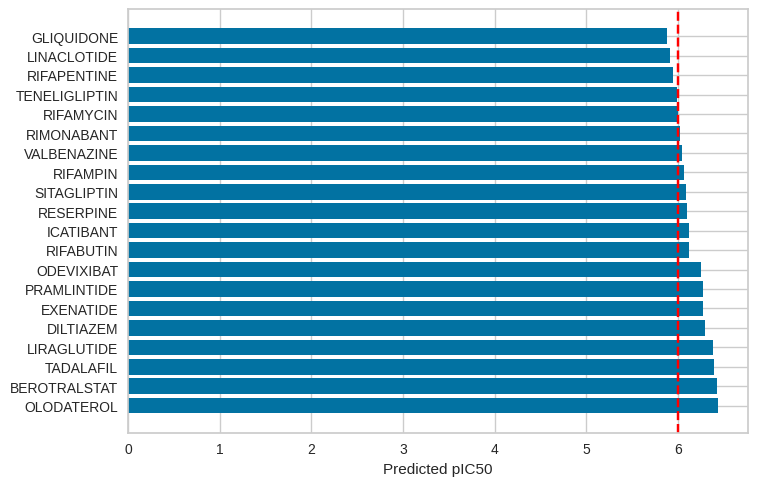

In [42]:
import matplotlib.pyplot as plt

# Select the first column for x-axis and the second column for y-axis
x_bar = top_20[:, 0]  # First column as x-axis
y_bar = top_20[:, 1]  # Second column as y-axis
threshold = 6

# Create a bar plot
plt.barh(x_bar, y_bar)

plt.xlabel('Predicted pIC50')

# Add a horizontal line for the threshold value
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')